In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Evaluation Plots**

In [3]:
# Alivia's Paths
# res50_path = f"/content/drive/MyDrive/.../ResNet-50/Evaluation.txt"
# res101_path = f"/content/drive/MyDrive/.../ResNet-101/Evaluation.txt"
# swint_path = f"/content/drive/MyDrive/.../Swin-T/Evaluation.txt"
# segnet_path = f"/content/drive/MyDrive/.../SegNet/Evaluation.txt"

# Dibyarup's Paths
res50_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/ResNet-50/Evaluation.txt"
res101_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/ResNet-101/Evaluation.txt"
swint_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/Swin-T/Evaluation.txt"
segnet_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/SegNet/Evaluation.txt"

In [4]:
pd.set_option('display.float_format', '{:.14f}'.format)

res50_metrics = pd.read_csv(res50_path, delimiter=": ", names=["Evaluation_Metric","Value"])
res101_metrics = pd.read_csv(res101_path, delimiter=": ", names=["Evaluation_Metric","Value"])
# swint_metrics = pd.read_csv(swint_path, delimiter=": ", names=["Evaluation_Metric","Value"])
segnet_metrics = pd.read_csv(segnet_path, delimiter=": ", names=["Evaluation_Metric","Value"])

<ipython-input-4-f8ec83e1c304>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  res50_metrics = pd.read_csv(res50_path, delimiter=": ", names=["Evaluation_Metric","Value"])
<ipython-input-4-f8ec83e1c304>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  res101_metrics = pd.read_csv(res101_path, delimiter=": ", names=["Evaluation_Metric","Value"])
<ipython-input-4-f8ec83e1c304>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine

In [35]:
# Extract values into lists
res50_values = res50_metrics.set_index('Evaluation_Metric')['Value'].to_dict()
res101_values = res101_metrics.set_index('Evaluation_Metric')['Value'].to_dict()
# swint_metrics = swint_metrics.set_index('Evaluation_Metric')['Value'].to_dict()
segnet_values = segnet_metrics.set_index('Evaluation_Metric')['Value'].to_dict()

# Create the new dataframe
evaluation_metrics = pd.DataFrame({
    # 'Model': [f'RoadSegNN \n(ResNet-50 Backbone)', f'RoadSegNN \n(ResNet-101 Backbone)', f'RoadSegNN \n(Swin-T Backbone)', 'SegNet'],
    'Model': [f'RoadSegNN \n(ResNet-50 Backbone)', f'RoadSegNN \n(ResNet-101 Backbone)', 'SegNet'],
    'Time Taken': [res50_values['Time taken'], res101_values['Time taken'], segnet_values['Time taken']],
    'MSE': [res50_values['MSE'], res101_values['MSE'], segnet_values['MSE']],
    'SSIM': [res50_values['SSIM'], res101_values['SSIM'], segnet_values['SSIM']],
    'Accuracy': [res50_values['Accuracy'], res101_values['Accuracy'], segnet_values['Accuracy']],
    'Recall': [res50_values['Recall'], res101_values['Recall'], segnet_values['Recall']],
    'Precision': [res50_values['Precision'], res101_values['Precision'], segnet_values['Precision']],
    'F1 Score': [res50_values['F1 Score'], res101_values['F1 Score'], segnet_values['F1 Score']]
})

evaluation_metrics

,Model,Time Taken,MSE,SSIM,Accuracy,Recall,Precision,F1 Score
0,RoadSegNN \n(ResNet-50 Backbone),0.01804933578837,0.02621390856802,0.45896074175835,0.97378611564636,0.45138573550542,0.48842012341834,0.46917318314795
1,RoadSegNN \n(ResNet-101 Backbone),0.02754566314537,0.02484901249409,0.42245692014694,0.97515100240707,0.40426841939152,0.52045578399750,0.45506284713992
2,SegNet,0.00663023666271,0.02783468551934,0.33640849590302,0.97216492891312,0.27105189697466,0.43729954369799,0.33466679765512


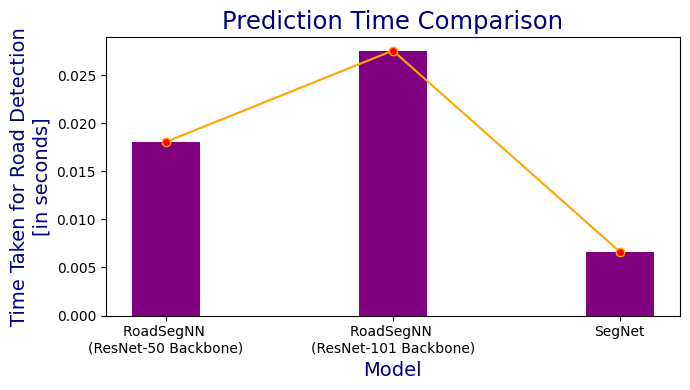

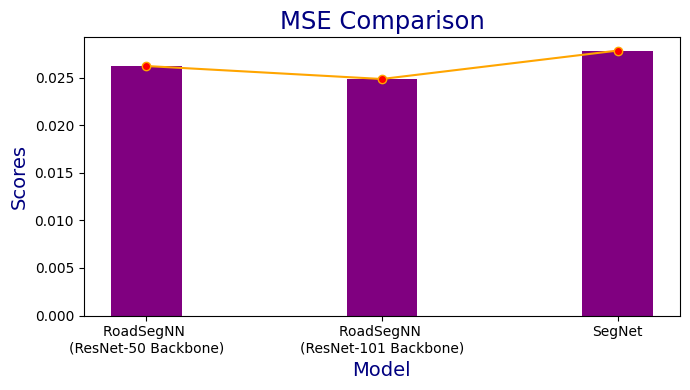

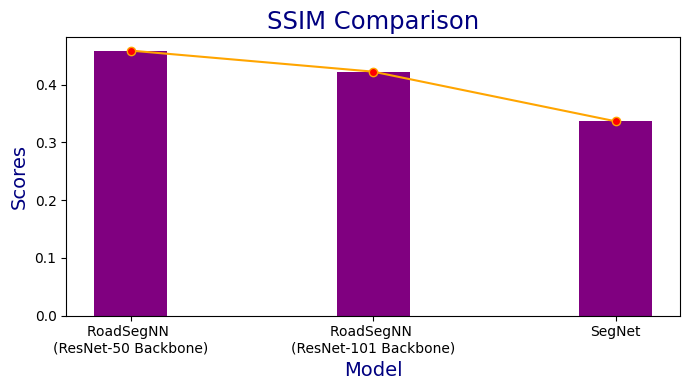

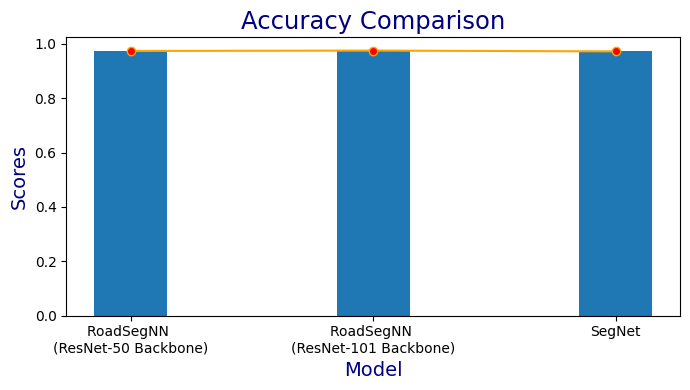

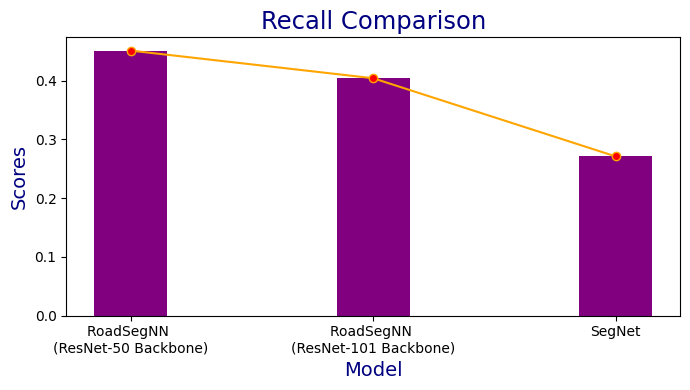

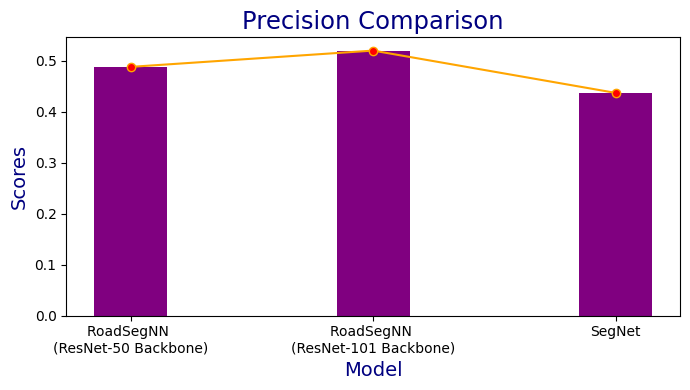

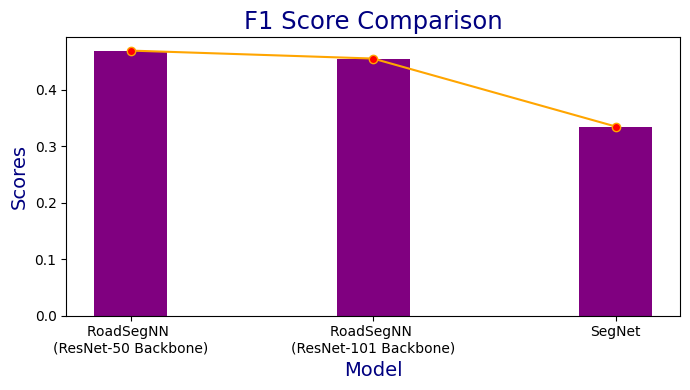

In [82]:
index = evaluation_metrics['Model']
time_taken = evaluation_metrics['Time Taken']
mse = evaluation_metrics['MSE']
ssim = evaluation_metrics['SSIM']
accuracy = evaluation_metrics['Accuracy']
recall = evaluation_metrics['Recall']
precision = evaluation_metrics['Precision']
f1_score = evaluation_metrics['F1 Score']

# Plotting Time Taken
plt.figure(figsize=(7, 4))
width = 0.3
plt.bar(index, time_taken, width, color='purple')
plt.plot(index, time_taken, color='orange', marker='o', markerfacecolor='red')
# plt.ylim(0, 0.05, 0.01)
plt.title('Prediction Time Comparison', fontsize=17.5, color='navy')
plt.xlabel('Model', fontsize=14, color='navy')
plt.ylabel('Time Taken for Road Detection\n[in seconds]', fontsize=14, color='navy')
plt.show()

print()

# Plotting MSE
plt.figure(figsize=(7, 4))
width = 0.3
plt.bar(index, mse, width, color='purple')
plt.plot(index, mse, color='orange', marker='o', markerfacecolor='red')
# plt.ylim(0, 0.055, 0.001)
plt.title('MSE Comparison', fontsize=17.5, color='navy')
plt.xlabel('Model', fontsize=14, color='navy')
plt.ylabel('Scores', fontsize=14, color='navy')
plt.show()

print()

# Plotting SSIM
plt.figure(figsize=(7, 4))
width = 0.3
plt.bar(index, ssim, width, color='purple')
plt.plot(index, ssim, color='orange', marker='o', markerfacecolor='red')
# plt.ylim(0, 0.5, 0.1)
plt.title('SSIM Comparison', fontsize=17.5, color='navy')
plt.xlabel('Model', fontsize=14, color='navy')
plt.ylabel('Scores', fontsize=14, color='navy')
plt.show()

print()

# Plotting Accuracy
plt.figure(figsize=(7, 4))
width = 0.3
plt.bar(index, accuracy, width, color='purple')
plt.plot(index, accuracy, color='orange', marker='o', markerfacecolor='red')
# plt.ylim(0, 1, 0.2)
plt.title('Accuracy Comparison', fontsize=17.5, color='navy')
plt.xlabel('Model', fontsize=14, color='navy')
plt.ylabel('Scores', fontsize=14, color='navy')
plt.show()

print()

# Plotting Recall
plt.figure(figsize=(7, 4))
width = 0.3
plt.bar(index, recall, width, color='purple')
plt.plot(index, recall, color='orange', marker='o', markerfacecolor='red')
# plt.ylim(0, 0.6, 0.1)
plt.title('Recall Comparison', fontsize=17.5, color='navy')
plt.xlabel('Model', fontsize=14, color='navy')
plt.ylabel('Scores', fontsize=14, color='navy')
plt.show()

print()

# Plotting Precision
plt.figure(figsize=(7, 4))
width = 0.3
plt.bar(index, precision, width, color='purple')
plt.plot(index, precision, color='orange', marker='o', markerfacecolor='red')
# plt.ylim(0, 0.8, 0.1)
plt.title('Precision Comparison', fontsize=17.5, color='navy')
plt.xlabel('Model', fontsize=14, color='navy')
plt.ylabel('Scores', fontsize=14, color='navy')
plt.show()

print()

# Plotting F1 Score
plt.figure(figsize=(7, 4))
width = 0.3
plt.bar(index, f1_score, width, color='purple')
plt.plot(index, f1_score, color='orange', marker='o', markerfacecolor='red')
# plt.ylim(0, 0.8, 0.1)
plt.title('F1 Score Comparison', fontsize=17.5, color='navy')
plt.xlabel('Model', fontsize=14, color='navy')
plt.ylabel('Scores', fontsize=14, color='navy')
plt.show()

<ipython-input-36-094f6f5984e0>:20: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 3.1, 0.0001)


<Figure size 1680x1000 with 0 Axes>

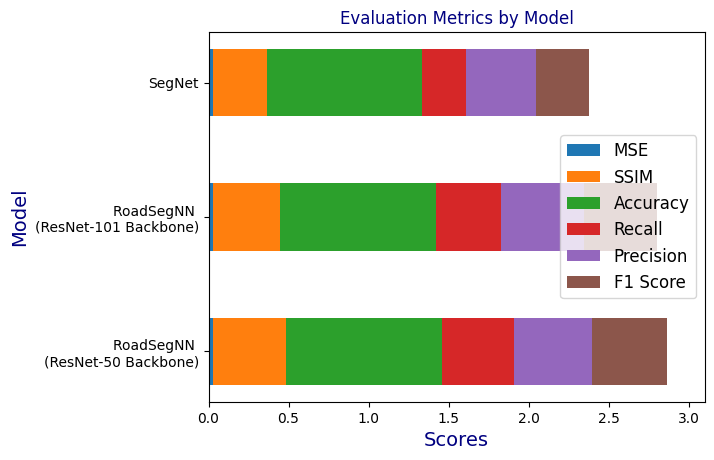

In [36]:
# Plotting
plt.figure(figsize=(16.8, 10.0))

# Plotting the stacked bar graph
fig, ax = plt.subplots()
plt.xlim(0, 3.1, 0.0001)
# plt.ylim(0, 1.1, 1)

# Define the positions for the bars on the x-axis
width = 0.5
index = evaluation_metrics['Model']

# Stacking the bars
ax.barh(index, evaluation_metrics['MSE'], width, label='MSE')
ax.barh(index, evaluation_metrics['SSIM'], width, left=evaluation_metrics['MSE'], label='SSIM')
ax.barh(index, evaluation_metrics['Accuracy'], width, left=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'], label='Accuracy')
ax.barh(index, evaluation_metrics['Recall'], width, left=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'] + evaluation_metrics['Accuracy'], label='Recall')
ax.barh(index, evaluation_metrics['Precision'], width, left=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'] + evaluation_metrics['Accuracy'] + evaluation_metrics['Recall'], label='Precision')
ax.barh(index, evaluation_metrics['F1 Score'], width, left=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'] + evaluation_metrics['Accuracy'] + evaluation_metrics['Recall'] + evaluation_metrics['Precision'], label='F1 Score')

# Adding labels and title
ax.set_title('Evaluation Metrics by Model', color='navy')
ax.set_xlabel('Scores', fontsize=14, color='navy')
ax.set_ylabel('Model', fontsize=14, color='navy')

plt.legend(fontsize='large')
plt.show()